# Attrition Assignment

### Steps :-
1. Importing Libraries<br>
2. Data Treatment<br>
3. Univariate Analysis<br>
4. Data Visualistation<br>
5. Statistical Tests<br>
6. Correlation Ananlysis<br>

## 1. Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#importing dataset
df = pd.read_csv('general_data.csv')
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


## 2. Data Treatment

In [3]:
df.isnull().sum() #check for null values

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [4]:
df[['NumCompaniesWorked', 'TotalWorkingYears']].mean()

NumCompaniesWorked     2.694830
TotalWorkingYears     11.279936
dtype: float64

In [5]:
# filling up null values with their mean
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].fillna(2.69) 
df['TotalWorkingYears'] = df['TotalWorkingYears'].fillna(11.28)
# checking if it is filled
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

## Encoding to numeric data

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Department'] = le.fit_transform(df['Department'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['JobRole'] = le.fit_transform(df['JobRole'])

df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,1,0,...,1.0,Y,11,8,0,1.00,6,1,0,0
1,31,1,1,1,10,1,1,1,2,0,...,0.0,Y,23,8,1,6.00,3,5,1,4
2,32,0,1,1,17,4,4,1,3,1,...,1.0,Y,15,8,3,5.00,2,5,0,3
3,38,0,0,1,2,5,1,1,4,1,...,3.0,Y,11,8,3,13.00,5,8,7,5
4,32,0,2,1,10,1,3,1,5,1,...,4.0,Y,12,8,2,9.00,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,2,1,5,4,3,1,4406,0,...,3.0,Y,17,8,1,10.00,5,3,0,2
4406,29,0,2,1,2,4,3,1,4407,1,...,2.0,Y,15,8,0,10.00,2,3,0,2
4407,25,0,2,1,25,2,1,1,4408,1,...,0.0,Y,20,8,0,5.00,4,4,1,2
4408,42,0,2,2,18,2,3,1,4409,1,...,0.0,Y,14,8,1,10.00,2,9,7,8


In [7]:

#making a new dataframe with the columns to work on
df1 = df[['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField','Gender', 'MaritalStatus',
       'JobLevel', 'JobRole', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
#making variables to store Attrition values
df_y = df1[df1['Attrition']==1]
df_n = df1[df1['Attrition']==0]
cols = list(df1.columns)

In [8]:
df[['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField','Gender', 'MaritalStatus',
       'JobLevel', 'JobRole', 'MonthlyIncome',
       'NumCompaniesWorked']].describe()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,MaritalStatus,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,0.161224,1.607483,1.260544,9.192517,2.912925,2.247619,0.600000,1.097279,2.063946,4.458503,65029.312925,2.694810
std,9.133301,0.367780,0.665304,0.527673,8.105026,1.023933,1.331067,0.489954,0.729955,1.106689,2.461263,47068.888559,2.493497
min,18.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,10090.000000,0.000000
25%,30.000000,0.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,2.000000,29110.000000,1.000000
50%,36.000000,0.000000,2.000000,1.000000,7.000000,3.000000,2.000000,1.000000,1.000000,2.000000,5.000000,49190.000000,2.000000
75%,43.000000,0.000000,2.000000,2.000000,14.000000,4.000000,3.000000,1.000000,2.000000,3.000000,7.000000,83800.000000,4.000000
max,60.000000,1.000000,2.000000,2.000000,29.000000,5.000000,5.000000,1.000000,2.000000,5.000000,8.000000,199990.000000,9.000000


In [9]:
df[['PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].describe()

,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,15.209524,11.279937,2.799320,7.008163,2.187755,4.123129
std,3.659108,7.774275,1.288978,6.125135,3.221699,3.567327
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,14.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,18.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,25.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [10]:
df1.mode()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,MaritalStatus,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,35,0,2,1,2,3,1,1,1,1,7,23420,1.0,11,10.0,2,5,0,2


In [11]:
df_med = pd.DataFrame(df1.median(), columns = ['Median'])
df_med

,Median
Age,36.0
Attrition,0.0
BusinessTravel,2.0
Department,1.0
DistanceFromHome,7.0
Education,3.0
EducationField,2.0
Gender,1.0
MaritalStatus,1.0
JobLevel,2.0


In [12]:
# Finding out the variance
df_var = pd.DataFrame(df1.var(), columns = ['Variance'])
df_var

,Variance
Age,8.341719e+01
Attrition,1.352618e-01
BusinessTravel,4.426294e-01
Department,2.784384e-01
DistanceFromHome,6.569144e+01
Education,1.048438e+00
EducationField,1.771740e+00
Gender,2.400544e-01
MaritalStatus,5.328345e-01
JobLevel,1.224760e+00


In [13]:
# Finding out the skewness
df_skew = pd.DataFrame(df1.skew(), columns = ['Skewness'])
df_skew

,Skewness
Age,0.413005
Attrition,1.843111
BusinessTravel,-1.438026
Department,0.172114
DistanceFromHome,0.957466
Education,-0.289484
EducationField,0.549997
Gender,-0.408387
MaritalStatus,-0.152071
JobLevel,1.024703


Age, Department, EducationField, Education and TrainingTimesLastYear are having skewness between -0.5 and 0.5 hence, they are approximately symmetrical

Plotting distribution plot to visualize skewness and kurtosis

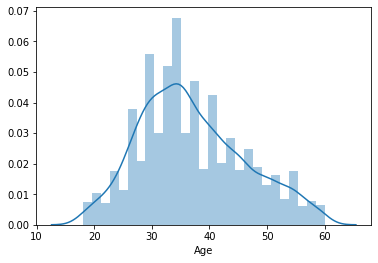

In [14]:
sns.distplot(df1['Age'])
plt.show()

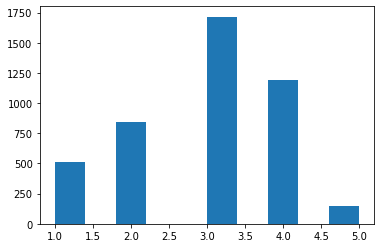

In [15]:
plt.hist(df1['Education'])
plt.show()

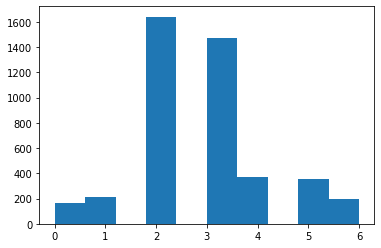

In [17]:
plt.hist(df1['TrainingTimesLastYear'])
plt.show()


In [18]:
# Finding out the Kurtosis
df_kurt = pd.DataFrame(df1.kurt(), columns = ['Kurtosis'])
df_kurt

,Kurtosis
Age,-0.405951
Attrition,1.397690
BusinessTravel,0.698371
Department,-0.393269
DistanceFromHome,-0.227045
Education,-0.560569
EducationField,-0.689242
Gender,-1.834052
MaritalStatus,-1.115231
JobLevel,0.395525


## OUTLIERS

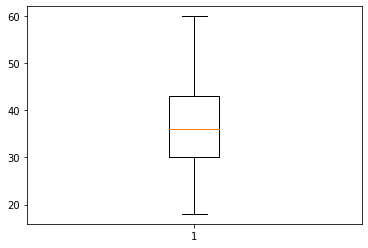

In [19]:
plt.boxplot(df['Age'])
plt.show()

As we can see here, Age is normally distributed with no outliers

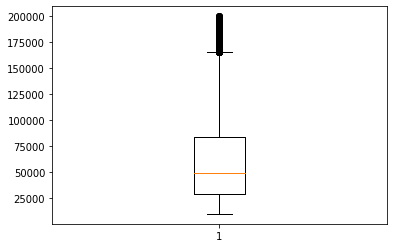

In [20]:
plt.boxplot(df['MonthlyIncome'])
plt.show()

MonthlyIncome is positively skewed to the right with several outliers

## Non Parametric Tests

In [23]:
# making a dataframe of continuous columns
cols_cont = df[['Age', 'DistanceFromHome', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [24]:
from scipy.stats import mannwhitneyu

In [25]:
# making function to run mannwhitney test for a column against attrition
def mwtest(column):
    
    stats, p = mannwhitneyu(df_y[column], df_n[column])
    print(f"\tp value is {round(p, 3)}\n")
    
# making a function to print all continuous columns vs attrition along with hypothesis and decision 
def mwtest_all(colname):
    print(f"{colname} vs Attrition: \n")
    print(f"\tH0: There are no significant differences in the {colname} between attrition (Y) and attirition (N)")
    print(f"\tH1: There are significant differences in the {colname} between attrition (Y) and attirition (N)")
    print("\n")
    print("\tPerforming MannWhitneyU Test:")
    stats, p = mannwhitneyu(df_y[colname], df_n[colname])
    print(f"\tObtained p value is {round(p, 3)}\n")
    if p < 0.05:
        print(f"\tAs the P value of {round(p, 3)} is < 0.05, the H0 is rejected and H1 is accepted.")
        print(f"\tTherefore, there are significant differences in the {colname} between attrition (Y) and attirition (N)")
    else:
        print(f"\tAs the P value of {round(p, 3)} is > 0.05, the H0 is accepted and H1 is rejected.")
        print(f"\tTherefore, there are no significant differences in the {colname} between attrition (Y) and attirition (N)")
    print("\n ----------- \n")

In [26]:
# running the test
cols = list(cols_cont.columns)
for col in cols:
    mwtest_all(col)

Age vs Attrition: 

	H0: There are no significant differences in the Age between attrition (Y) and attirition (N)
	H1: There are significant differences in the Age between attrition (Y) and attirition (N)


	Performing MannWhitneyU Test:
	Obtained p value is 0.0

	As the P value of 0.0 is < 0.05, the H0 is rejected and H1 is accepted.
	Therefore, there are significant differences in the Age between attrition (Y) and attirition (N)

 ----------- 

DistanceFromHome vs Attrition: 

	H0: There are no significant differences in the DistanceFromHome between attrition (Y) and attirition (N)
	H1: There are significant differences in the DistanceFromHome between attrition (Y) and attirition (N)


	Performing MannWhitneyU Test:
	Obtained p value is 0.463

	As the P value of 0.463 is > 0.05, the H0 is accepted and H1 is rejected.
	Therefore, there are no significant differences in the DistanceFromHome between attrition (Y) and attirition (N)

 ----------- 

MonthlyIncome vs Attrition: 

	H0: Ther

## Chisquare Test

In [30]:
from scipy.stats import chi2_contingency
df_chi = pd.read_csv('general_data.csv')

In [31]:
# making a function to run ChiSquare Test and print out the hypothesis and result
def chitest(column):
    print(f"ChiSquare Test to check for dependency between Attrition and {column}-\n\n")
    print(f"\tH0: There is no dependency between Attrition and {column}")
    print(f"\tH1: There is dependency between Attrition and {column}")
    
    chitable = pd.crosstab(df_chi[column], df_chi['Attrition'])
    print("\nChitbale:\n\n",chitable)
    stats, p, dof, expected = chi2_contingency(chitable)
    print(f"\n\tObtained p value is {round(p, 3)}")
    
    if p > 0.05:
        print(f"\n\tSince here p value {round(p,3)} is > 0.05 we accept the null hypothesis")
        print(f"\n\tTherefore, there is no dependency between Attrition and {column}\n\n----------\n")
    else:
        print(f"\n\tSince here p value {round(p,3)} is < 0.05 we reject the null hypothesis")
        print(f"\n\tTherefore, there is dependency between Attrition and {column}\n\n----------\n")

In [32]:
df_cat = df_chi[['Education', 'BusinessTravel', 'Gender', 'Department', 'EducationField', 'JobLevel', 'JobRole', 'MaritalStatus', 'StockOptionLevel']].columns
for col in df_cat:
    chitest(col)

ChiSquare Test to check for dependency between Attrition and Education-


	H0: There is no dependency between Attrition and Education
	H1: There is dependency between Attrition and Education

Chitbale:

 Attrition    No  Yes
Education           
1           432   78
2           687  159
3          1449  267
4          1008  186
5           123   21

	Obtained p value is 0.228

	Since here p value 0.228 is > 0.05 we accept the null hypothesis

	Therefore, there is no dependency between Attrition and Education

----------

ChiSquare Test to check for dependency between Attrition and BusinessTravel-


	H0: There is no dependency between Attrition and BusinessTravel
	H1: There is dependency between Attrition and BusinessTravel

Chitbale:

 Attrition            No  Yes
BusinessTravel              
Non-Travel          414   36
Travel_Frequently   624  207
Travel_Rarely      2661  468

	Obtained p value is 0.0

	Since here p value 0.0 is < 0.05 we reject the null hypothesis

	Therefore, there

## Parametric Test

## Separate T Test

In [33]:
from scipy.stats import ttest_ind
# making a function to perform separate t test and print hypothesis statements and decision
def separate_t(colname):
    print(f"{colname} vs Attrition: \n")
    print(f"\tH0: There are no significant differences in the {colname} between attrition (Y) and attirition (N)")
    print(f"\tH1: There are significant differences in the {colname} between attrition (Y) and attirition (N)")
    print("\n")
    print("\tPerforming MannWhitneyU Test:")
    stats, p = ttest_ind(df_y[colname], df_n[colname])
    print(f"\tObtained p value is {round(p, 3)}\n")
    if p < 0.05:
        print(f"\tAs the P value of {round(p, 3)} is < 0.05, the H0 is rejected and H1 is accepted.")
        print(f"\tTherefore, there are significant differences in the {colname} between attrition (Y) and attirition (N)")
    else:
        print(f"\tAs the P value of {round(p, 3)} is > 0.05, the H0 is accepted and H1 is rejected.")
        print(f"\tTherefore, there no are significant differences in the {colname} between attrition (Y) and attirition (N)")
    print("\n ----------- \n")

In [34]:
separate_t('Age')

Age vs Attrition: 

	H0: There are no significant differences in the Age between attrition (Y) and attirition (N)
	H1: There are significant differences in the Age between attrition (Y) and attirition (N)


	Performing MannWhitneyU Test:
	Obtained p value is 0.0

	As the P value of 0.0 is < 0.05, the H0 is rejected and H1 is accepted.
	Therefore, there are significant differences in the Age between attrition (Y) and attirition (N)

 ----------- 



In [35]:
separate_t('TrainingTimesLastYear')

TrainingTimesLastYear vs Attrition: 

	H0: There are no significant differences in the TrainingTimesLastYear between attrition (Y) and attirition (N)
	H1: There are significant differences in the TrainingTimesLastYear between attrition (Y) and attirition (N)


	Performing MannWhitneyU Test:
	Obtained p value is 0.001

	As the P value of 0.001 is < 0.05, the H0 is rejected and H1 is accepted.
	Therefore, there are significant differences in the TrainingTimesLastYear between attrition (Y) and attirition (N)

 ----------- 

